# Descrição

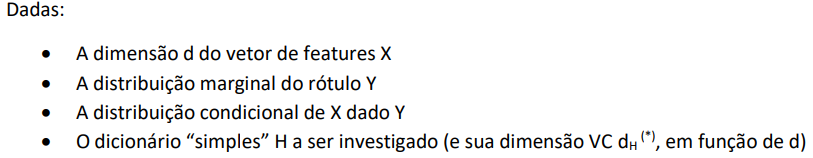

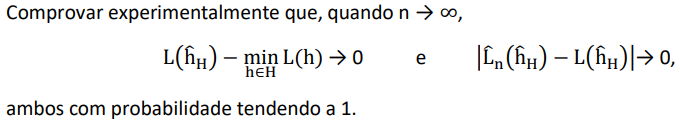


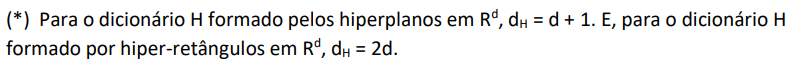

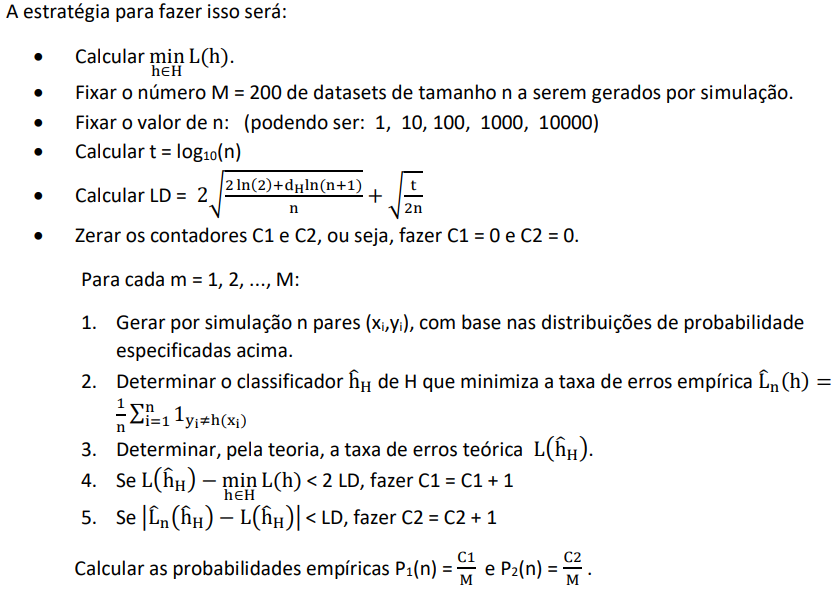

# Distribuições

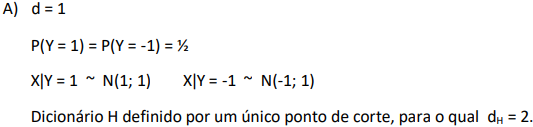

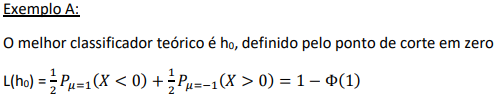

* L(h) se refere a probabilidade de erro do classificador h
- L(h) é mínima para o classificador de Bayes.

In [1]:
require(graphics)

In [3]:
getMultiples <- function(value, n) {
    container <- (value)
    for (i in (2:n)) {
        container <- append(container, value*i)
    }
    return (container)
}

In [4]:
getPowers <- function(value, n) {
    container <- (value)
    for (i in (2:n)) {
        container <- append(container, value**i)
    }
    return (container)
}

In [5]:
generateDistribution <- function(N, mean, sd) {
    groupA <- rnorm(N, mean, sd)
    groupB <- rnorm(N, -mean, sd)
    retContainer <- list(groupA, groupB)
    return (retContainer)
}

In [6]:
calculateLD <- function(n, dh) {
    t <- log10(n)
    aux1 <- 2*sqrt( ( 2*log(2) + dh*log(n+1) ) / n)
    aux2 <- sqrt(t/(2*n))
    return (aux1 + aux2)
}

In [257]:
generateDataFrame <- function(n) {
    target <- c(integer(n)+1, integer(n)-1 )
    x1 <- c( rnorm(n, 1, 1), rnorm(n, -1, 1) )
    df <- data.frame(x1, target)
    
    return (target)
}

In [231]:
sample(c(-1,1), 1)

[1] 1

In [240]:
rnorm(1, 1, 1)

[1] 2.272081

In [258]:
generateDataFrame(10)

[1]  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1

In [290]:
a <- rnorm(10,1,1)
print(a)
tail(a, 1)

 [1]  0.4795090  1.0463237  1.2067293 -0.2222946  1.4170037  0.4278746
 [7]  2.3713132 -0.0102467 -1.2161396 -0.2232445


[1] -0.2232445

In [298]:
generateRandomData <- function(n) {
    target <- c()
    x <- c()
    for (i in (1:n)) {
        target <- c(target, sample( c(-1,1), 1) )
        x <- c(x, rnorm(1, tail(target, 1), 1) )
    }
    df <- data.frame(x, target)
    return (df)
}
generateRandomData(1000)

x,target
-1.5699613,-1
1.7811774,1
1.8616509,1
0.3867843,1
-1.0495129,-1
-1.6083262,-1
1.3603360,1
0.0496935,1
-0.9859780,1
2.1407770,1


In [7]:
bayesError <- 0.158655 # Standard Normal Table
experimentalError <- 0
theoreticalError <- 0

A <- theoreticalError - 0
B <- experimentalError - theoreticalError

In [23]:
getBestRule <- function(data){
    for (i in c(1:nrow(temp)) ) {
    }
}

In [24]:
getBestRule(10)

ERROR: Error in nrow(temp): objeto 'temp' não encontrado


In [28]:
M <- 10
for (i in c(1:M)) {
    auxDataFrame <- generateDataFrame(i)
}

In [307]:
library(MASS)
auxDataFrame <- generateRandomData(10000)
fit <- lda(target~., data=auxDataFrame)
predictions <- predict(fit, auxDataFrame[,1:2])$class
table <- table(predictions, auxDataFrame$target)
P1 <- (table[1] + table[3]) / nrow(auxDataFrame)
P2 <- (table[2] + table[4]) / nrow(auxDataFrame)
accuracy <- (table[1] + table[4]) / (nrow(auxDataFrame))
P1
P2
accuracy

[1] 0.4985

[1] 0.5015

[1] 0.8429

In [68]:
table
table[1]
table[2]
table[3]
table[4]
(table[1] + table[4]) / (nrow(auxDataFrame))

           
predictions -1  1
         -1 91 13
         1   9 87

[1] 91

[1] 9

[1] 13

[1] 87

[1] 0.89

In [64]:
x <- c(1,2,3)
target <- c(1,-1,1)
df <- data.frame(x,target) 
df

x,target
1,1
2,-1
3,1


In [ ]:
simulate <- function(M) {
    nValues <- getPowers(10,5)
    nValues
    for (n in nValues) {
        generateRandomData(n)
    }
}
simulate(M)

In [313]:
for (n in nValues) {
    
}

[1] 1e+01 1e+02 1e+03 1e+04 1e+05

In [311]:
df_resumo <- data.frame(n=numeric(0),
                        t=numeric(0),
                        corte=numeric(0),
                        Ln=numeric(0),
                        L=numeric(0),
                        A=numeric(0),
                        LDx2=numeric(0),
                        B=numeric(0),
                        LD=numeric(0),
                        Prob=numeric(0) )

C1 <- 0 # contador 1
C2 <- 0 # contador 2
L_emprical <- 0 # Error empírico
L_theorical <- 0 # Erro teórico

df_resumo

n,t,corte,Ln,L,A,LDx2,B,LD,Prob
